In [2]:
from sympy import diff, symbols, cos, sin, Function, Symbol, dsolve, exp
from sympy import *
from IPython.display import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import copy

In [3]:
f = Function('f')
x = Symbol('x')

In [10]:
f = Function('f')
x = Symbol('x')
var(' C1 C2')
# - cos(3*x)*exp(-x)
des = dsolve(f(x).diff(x, x) + 9*f(x).diff(x) - 9*f(x) )
display(des)
eq1 = des.rhs.subs(x, 1)
display(eq1)
eq2 = des.rhs.diff(x).subs(x, 0)
display(eq2)
resh_sys = solve([eq1, eq2], C1, C2)
display(resh_sys)
res = des.rhs.subs([(C1, resh_sys[C1]), (C2, resh_sys[C2])])
display(res)


Eq(f(x), C1*exp(3*x*(-3 + sqrt(13))/2) + C2*exp(3*x*(-sqrt(13) - 3)/2))

C1*exp(-9/2 + 3*sqrt(13)/2) + C2*exp(-3*sqrt(13)/2 - 9/2)

C1*(-9/2 + 3*sqrt(13)/2) + C2*(-3*sqrt(13)/2 - 9/2)

{C2: 0, C1: 0}

0

In [13]:
f = lambdify(x, res, 'numpy')
x = np.arange(0, 2, 0.05)
plt.plot(x, f)
plt.grid()
plt.show()

SyntaxError: invalid syntax (<string>, line 1)

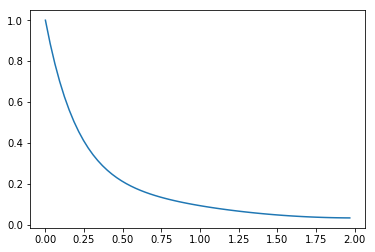

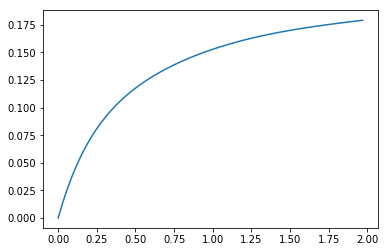

In [9]:
a = 1./3
b = 2./3
e = 0.01
k = 2
u1 = np.zeros((10000))
u0 = np.zeros((10000))
up = np.zeros((10000))
i = 0
u1[0] = 1
up[0] = 0
n=0
while abs(u1[2*i]-up[i])/abs(u1[2*i])>e :
    n+=1
    x = np.arange(0, 2, 1/k)
    t = 2./k
    up = u1
    u1[0] = 1
    u0[0] = 0
    for j in range(k):
        u1[j+1] = (u1[j] + t/2*9*a*u0[j] - t/2*9*a*u1[j] + t/2*a*cos(3*x[j])*exp(-x[j])+ t/2*b*u0[j] +(t/2)**2*b*a*u1[j] + t/2*b*cos(3*x[j+1])*exp(-x[j+1]))/(1+ t/2*9*b - (t/2*b)**2)
        u0[j+1] = u0[j] + t/2*a*u1[j] + t/2*b*u1[j+1]
#         print('u1: ', u1[j+1])
#         print('u0: ', u0[j+1])
    i = 1
    k = k*2
    if n>5:
        break
f = []
i=0
while u1[i] !=0:
    f.append(u1[i])
    i+=1
fp = []
i=1
fp.append(0)
while u0[i] !=0:
#     print(u0[i])
    fp.append(u0[i])
    i+=1
# print(f)
# print(fp)
plt.plot(np.arange(0, 2, 2/len(f)), f)
plt.show()

plt.plot(np.arange(0, 2, 2/len(f)), fp)
plt.show()

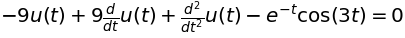

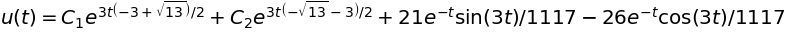

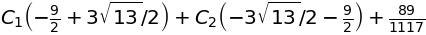

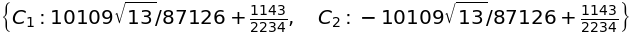

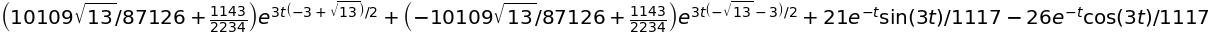

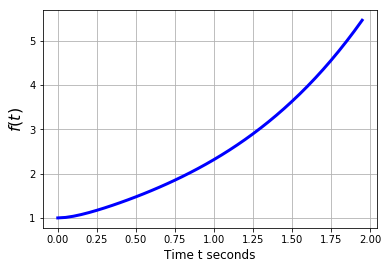

In [15]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
init_printing(use_latex=True)
var('t C1 C2')
u = Function("u")(t)  # Это переменная, но не функция.
# m=20 #Показатель массы.
# w=10.0#Показатель демпфирования колебаний.
# c=0.3#Показатель жёсткости.
# a=1#Бесконечный импульс силы.
#Все показатели условные(только для исследования характера зависимостей).
t#Текущее время.
r = 9
m = 0.33333333
c = 3
a=0
de = Eq(u.diff(t,t)+r*u.diff(t)-r*u- cos(c*t)*exp(-t), a) #-Дифференциальное уравнение колебаний.
display(de)#-Вывод на дисплей.
des = dsolve(de,u)#Символьное решение уравнения методом Коши в общем виде.
display(des)#Вывод на дисплей.
eq1=des.rhs.subs(t,0)-1;#Условие равенства нулю перемещения в момент времени t=0.
display(eq1)#Вывод на дисплей.
eq2=des.rhs.diff(t).subs(t,0)#Условие равенства нулю скорости перемещения в момент
# времени t=0.
display(eq2)#Вывод на дисплей.
seq=solve([eq1,eq2],C1,C2)#Решение системы для определения коэффициентов C1,C2.
display(seq)#Вывод на дисплей
rez=des.rhs.subs([(C1,seq[C1]),(C2,seq[C2])])#Вид решения дифференциального
#уравнения с численными значениями коэффициентов.
display(rez)#Вывод на дисплей.
f=lambdify(t, rez, "numpy")#Перевод символьного решения в численное для работы
#с модулем numpy .
x = np.arange(0.0,2,0.05)         
plt.plot(x,f(x),color='b', linewidth=3)
plt.xlabel('Time t seconds',fontsize=12)
plt.ylabel('$f(t)$',fontsize=16)
plt.grid(True)
plt.show()


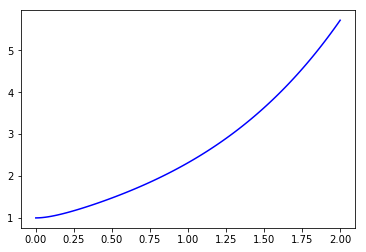

In [41]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def g(y, x):
    y0 = y[0]
    y1 = y[1]
    y2 = -9*y1 + 9*y0 + cos(3*x)*exp(-x)
    return y1, y2

# Initial conditions on y, y' at x=0
init = 1.0, 0.0
# First integrate from 0 to 2
x = np.linspace(0,2,100)
sol=odeint(g, init, x)
# Then integrate from 0 to -2
plt.plot(x, sol[:,0], color='b')

plt.show()